## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Set chart

In [2]:
plt.style.use('bmh')
plt.rcParams['figure.figsize'] = (12, 6)

## Read Data

In [3]:
df=pd.read_csv('Online Retail.csv')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   541909 non-null  int64  
 7   Country      541909 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 33.1+ MB


* StockCode : Mã dùng để xác định sản phẩm đã được mua
* Description : Mô tả ngắn gọn về sản phẩm đã được mua
* Quantity : Số lượng sản phẩm đã được mua
* InvoiceDate : Ngày và giờ thực hiện giao dịch mua hàng
* UnitPrice : Giá của một đơn vị sản phẩm đã được mua
* CustomerID : Mã định danh duy nhất của khách hàng đã thực hiện giao dịch mua hàng
* Country : Quốc gia nơi khách hàng thực hiện giao dịch mua hàng

## Data cleaning

In [5]:
df.CustomerID.isnull().sum()

0

In [6]:
df.InvoiceDate=pd.to_datetime(df.InvoiceDate)

In [7]:
df.shape

(541909, 8)

In [8]:
df.isna().sum()

InvoiceNo         0
StockCode         0
Description    1454
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID        0
Country           0
dtype: int64

In [9]:
df[df.Description.isnull()].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,15287,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,15287,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,15287,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,15287,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,15287,United Kingdom


In [10]:
df[df.Description.notnull()].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [11]:
df.loc[df.Description.isnull(),'Description']= 'None'

In [12]:
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [13]:
df.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909,541909,541909,541909.000000,541909,541909.000000,541909.000000,541909
unique,25900,4070,4224,NaN,NaN,NaN,NaN,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,NaN,NaN,NaN,United Kingdom
freq,1114,2313,2369,NaN,NaN,NaN,NaN,495478
mean,NaN,NaN,NaN,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.518434,NaN
min,NaN,NaN,NaN,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,2011-03-28 11:34:00,1.250000,14367.000000,NaN
50%,NaN,NaN,NaN,3.000000,2011-07-19 17:17:00,2.080000,15287.000000,NaN
75%,NaN,NaN,NaN,10.000000,2011-10-19 11:27:00,4.130000,16255.000000,NaN
max,NaN,NaN,NaN,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000,NaN


In [14]:
df['TotalRevenue'] = df['Quantity'] * df['UnitPrice']

In [15]:
df["Hour"] = df["InvoiceDate"].dt.hour
df["Date"] = df["InvoiceDate"].dt.date

### 1. Data transaction overview

In [16]:
chart1=df.groupby('Date')['InvoiceDate'].count().reset_index()
chart1.head()

,Date,InvoiceDate
0,2010-12-01,3108
1,2010-12-02,2109
2,2010-12-03,2202
3,2010-12-05,2725
4,2010-12-06,3878


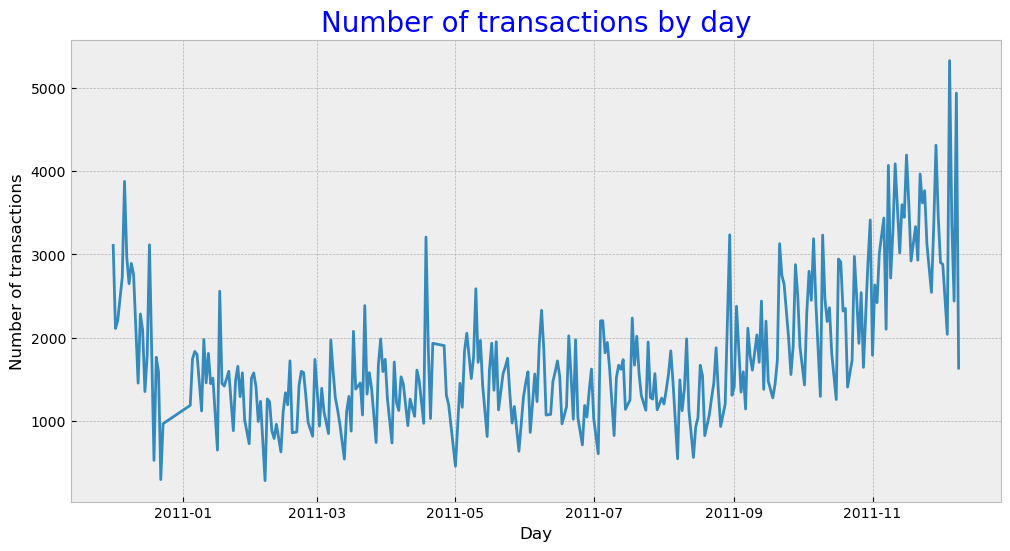

In [17]:
sns.lineplot(
    data=chart1,
    x='Date',
    y='InvoiceDate'
)
plt.title('Number of transactions by day',fontsize=20,color='b')
plt.xlabel('Day')
plt.ylabel('Number of transactions')
plt.show()

In [18]:
chart2=df['Country'].value_counts().reset_index()
chart2.head()

,Country,count
0,United Kingdom,495478
1,Germany,9495
2,France,8557
3,EIRE,8196
4,Spain,2533


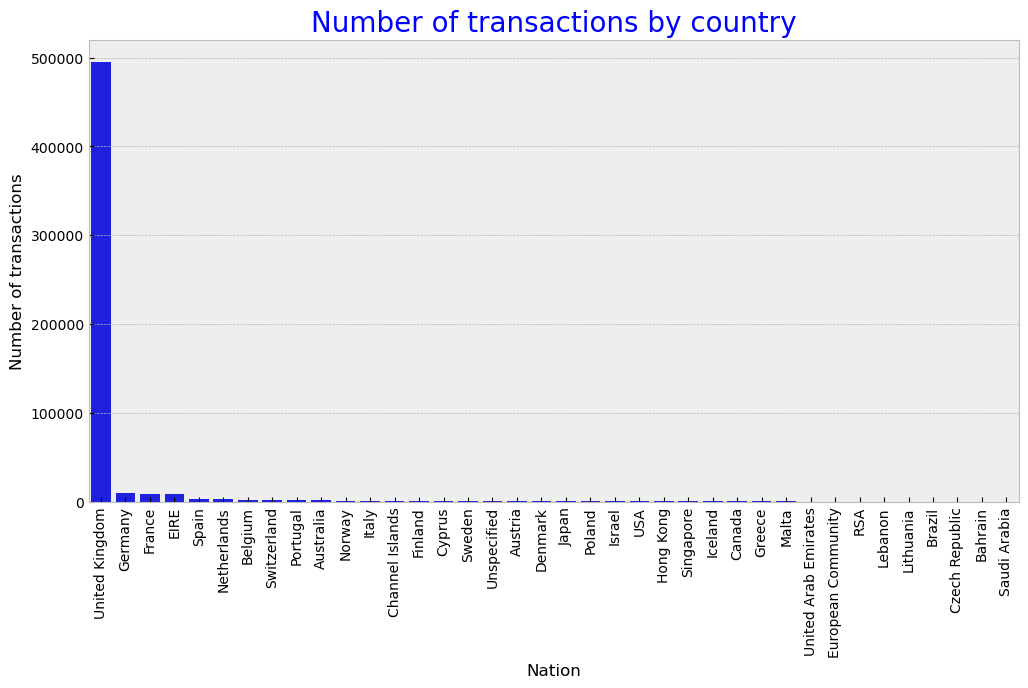

In [19]:
sns.barplot(
    data=chart2,
    x='Country',
    y='count',
    color='blue'
)
plt.title('Number of transactions by country',fontsize=20,color='b')
plt.xlabel('Nation')
plt.ylabel('Number of transactions')
plt.xticks(rotation=90)
plt.show()

## 2.Product analysis

In [20]:
chart3=df.groupby('StockCode')['Quantity'].sum().reset_index().sort_values('Quantity',ascending=False).head(10)
chart3

,StockCode,Quantity
1147,22197,56450
2997,84077,53847
3515,85099B,47363
3536,85123A,38830
3305,84879,36221
454,21212,36039
1982,23084,30646
1412,22492,26437
1530,22616,26315
966,21977,24753


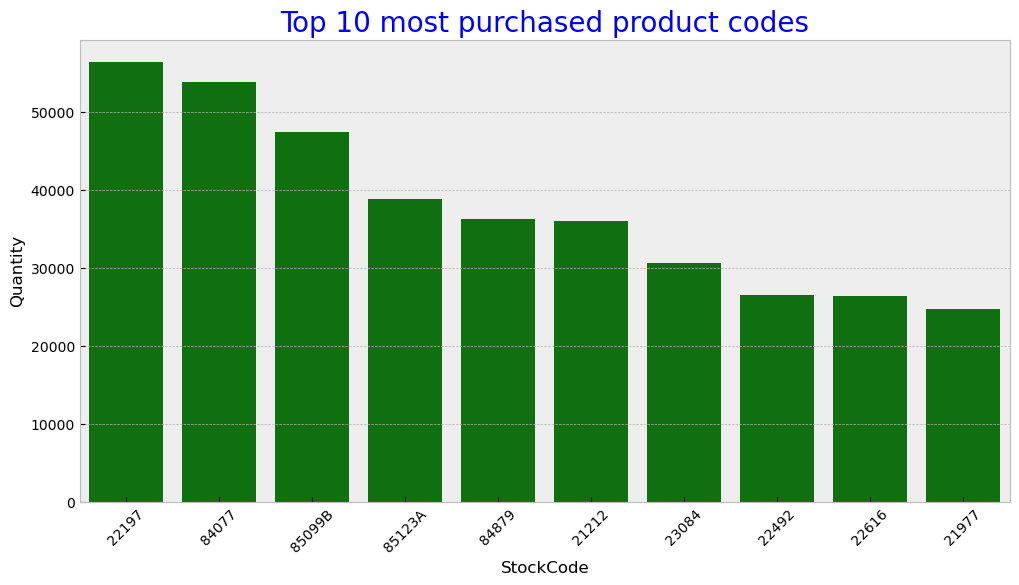

In [21]:
sns.barplot(
    data=chart3,
    x='StockCode',
    y='Quantity',
    color='green'
)
plt.title('Top 10 most purchased product codes',fontsize=20,color='b')
plt.xlabel('StockCode')
plt.xticks(rotation=45)
plt.ylabel('Quantity')
plt.show()

In [22]:
chart4=df.groupby('StockCode')['TotalRevenue'].sum().reset_index().sort_values('TotalRevenue',ascending=False).head(10)
chart4

,StockCode,TotalRevenue
4059,DOT,206245.48
1348,22423,164762.19
2733,47566,98302.98
3536,85123A,97894.50
3515,85099B,92356.03
1982,23084,66756.59
4062,POST,66230.64
1043,22086,63791.94
3305,84879,58959.73
2924,79321,53768.06


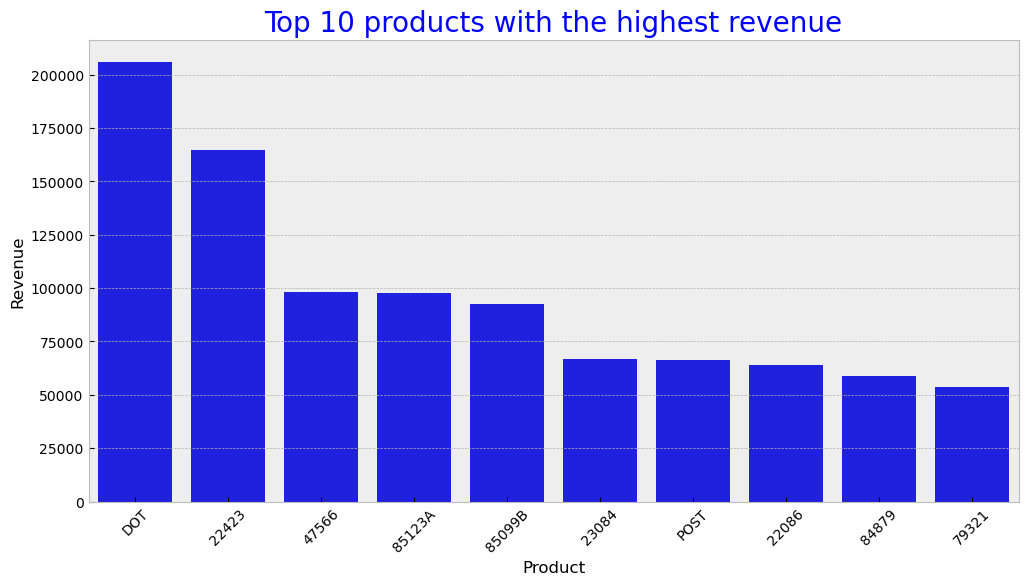

In [23]:
sns.barplot(
    data=chart4,
    x='StockCode',
    y='TotalRevenue',
    color='b'
)
plt.title('Top 10 products with the highest revenue',fontsize=20,color='b')
plt.xlabel('Product')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()

## 3. Customer analysis

In [24]:
chart5=df["CustomerID"].groupby(df["Country"]).nunique().reset_index()
chart5.head()

,Country,CustomerID
0,Australia,9
1,Austria,11
2,Bahrain,3
3,Belgium,25
4,Brazil,1


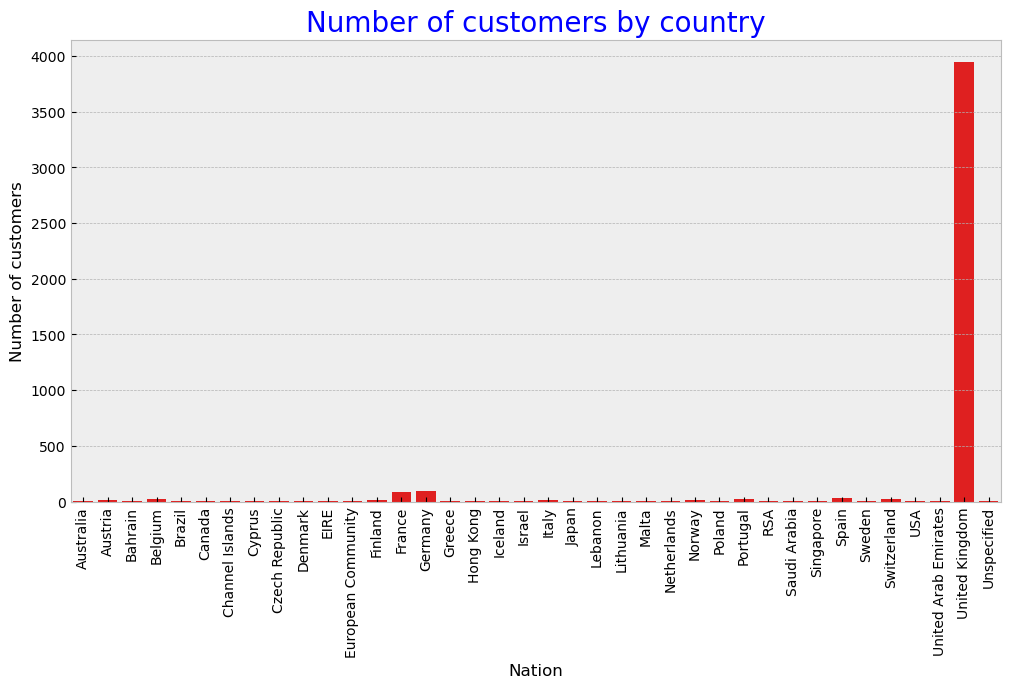

In [25]:
sns.barplot(
    data=chart5,
    x='Country',
    y='CustomerID',
    color='red'
)
plt.title('Number of customers by country',fontsize=20,color='b')
plt.xlabel('Nation')
plt.ylabel('Number of customers')
plt.xticks(rotation=90)
plt.show()

In [26]:
chart6=df.groupby("CustomerID")["TotalRevenue"].sum().reset_index().sort_values('TotalRevenue',ascending=False).head(10)
chart6

,CustomerID,TotalRevenue
2175,15287,1448167.36
1703,14646,279489.02
4233,18102,256438.49
3758,17450,187482.17
1895,14911,132572.62
55,12415,123725.45
1345,14156,113384.14
3801,17511,88125.38
3202,16684,65892.08
1005,13694,62653.10


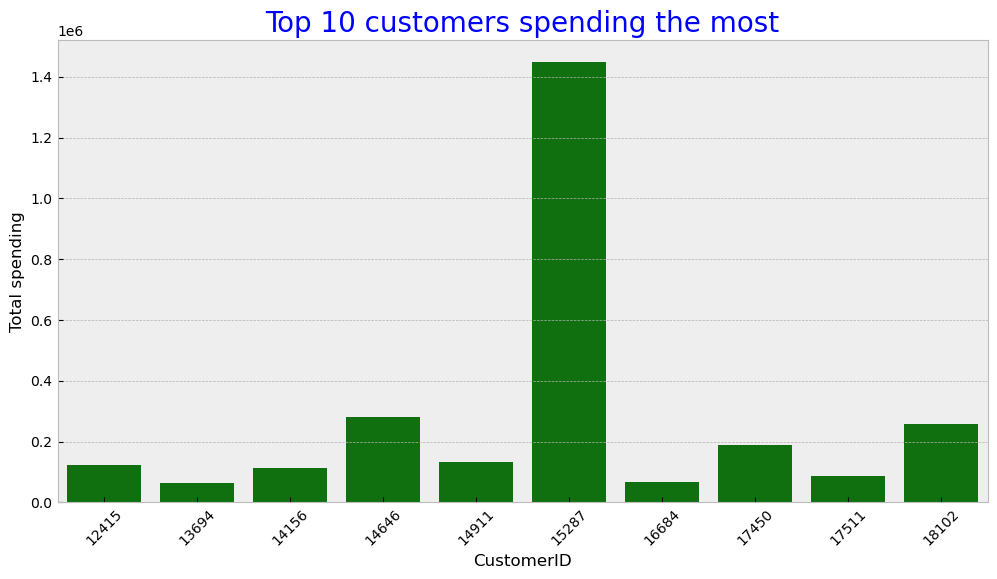

In [27]:
sns.barplot(
    data=chart6,
    x='CustomerID',
    y='TotalRevenue',
    color='green'
)
plt.title('Top 10 customers spending the most',fontsize=20,color='b')
plt.xlabel('CustomerID')
plt.ylabel('Total spending')
plt.xticks(rotation=45)
plt.show()

## 4.Analyze prices and revenue

In [28]:
chart7=df.groupby("Hour")["Quantity"].sum().reset_index()
chart7.head()

,Hour,Quantity
0,6,-86
1,7,15361
2,8,158163
3,9,429366
4,10,684416


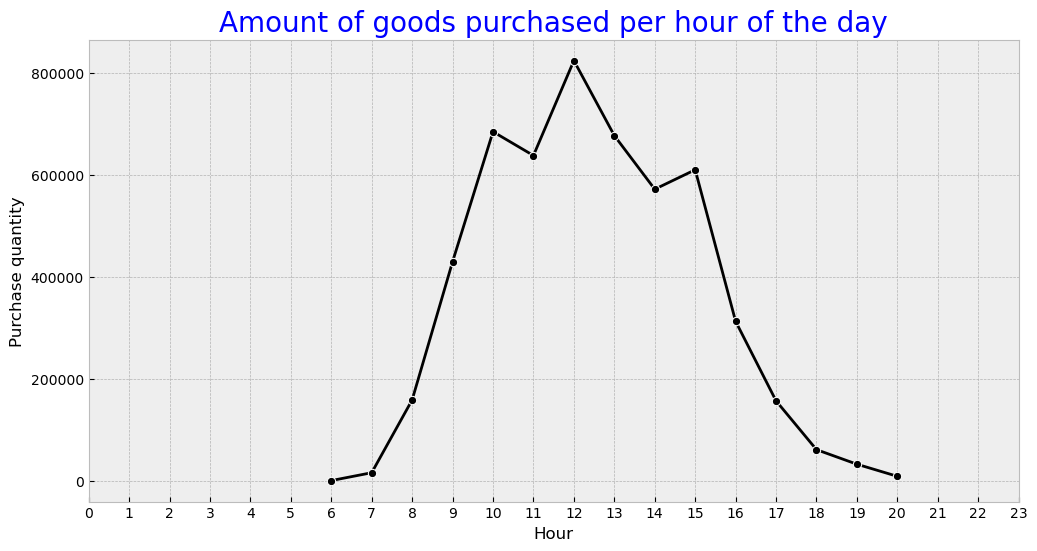

In [29]:
sns.lineplot(
    data=chart7,
    x='Hour',
    y='Quantity',
    marker='o',
    color='black'
)
plt.title('Amount of goods purchased per hour of the day',fontsize=20,color='b')
plt.xlabel('Hour')
plt.ylabel('Purchase quantity')
plt.xticks(range(0, 24))
plt.show()

In [30]:
chart8=df.groupby(df['InvoiceDate'].dt.to_period('M'))['TotalRevenue'].sum().reset_index()
chart8['InvoiceDate'] = chart8['InvoiceDate'].astype('str')
chart8

,InvoiceDate,TotalRevenue
0,2010-12,748957.020
1,2011-01,560000.260
2,2011-02,498062.650
3,2011-03,683267.080
4,2011-04,493207.121
5,2011-05,723333.510
6,2011-06,691123.120
7,2011-07,681300.111
8,2011-08,682680.510
9,2011-09,1019687.622


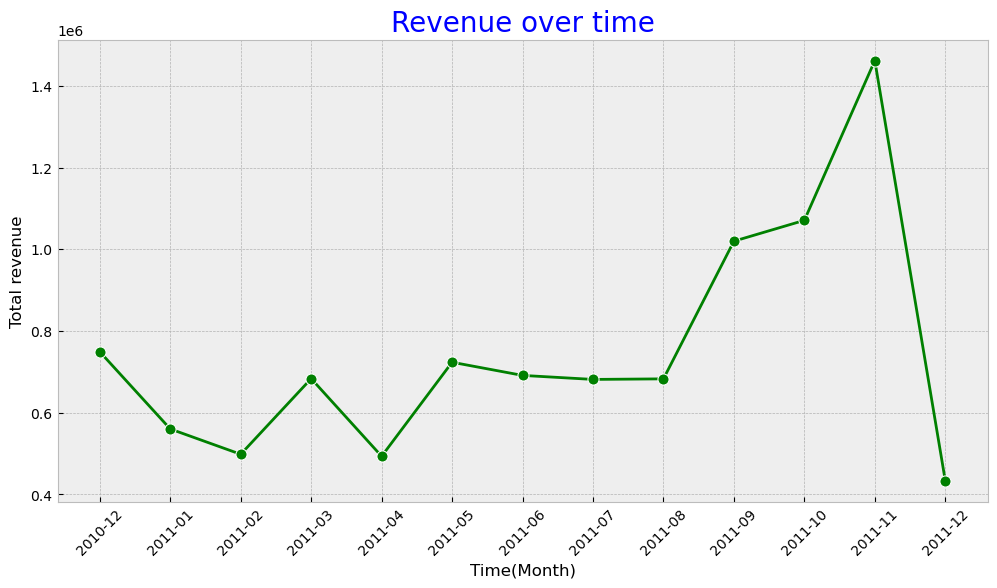

In [31]:
sns.lineplot(
    data=chart8,
    x='InvoiceDate',
    y='TotalRevenue',
    marker='o',
    color='green',
    markersize=8
)
plt.title('Revenue over time',fontsize=20,color='b')
plt.xlabel('Time(Month)')
plt.ylabel('Total revenue')
plt.xticks(rotation=45)
plt.show()